In [2]:
import os, pandas as pd, numpy as np

In [3]:
os.chdir("C:\\Users\\SARATH\\OneDrive\\Desktop\\SCMA A1a")

In [4]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [5]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [44]:
MPH = df[df['state']==23]

In [45]:
MPH.isnull().sum().sort_values(ascending = False)

soyabean_q             4717
soyabean_v             4717
Land_Leased_out        4562
Otherwise_possessed    4552
Meals_Employer         4472
                       ... 
cauli_q                   0
parwal_q                  0
bhindi_q                  0
chillig_q                 0
fv_tot                    0
Length: 384, dtype: int64

In [46]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [47]:
MPH_new = MPH[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [49]:
MPH_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       26
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [50]:
MPH_clean = MPH_new.copy()

In [51]:
MPH_clean.loc[:, 'Meals_At_Home'] = MPH_clean['Meals_At_Home'].fillna(MPH_new['Meals_At_Home'].mean())

In [52]:
MPH_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [14]:
# Outlier Checking

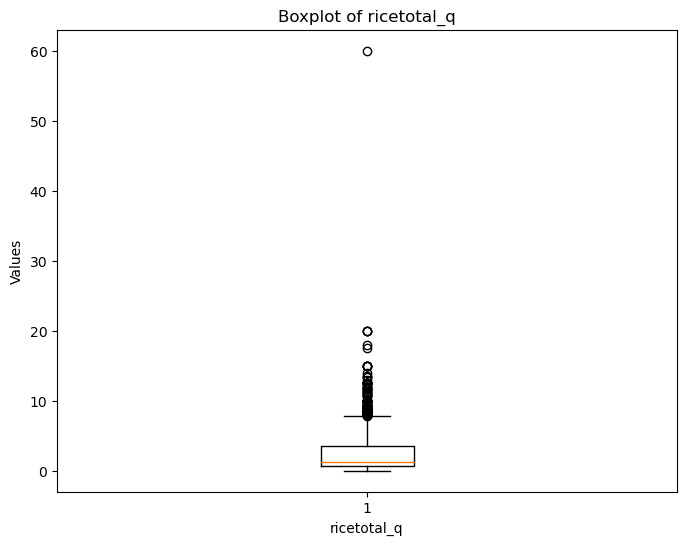

In [53]:
import matplotlib.pyplot as plt
# Assuming MPH_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(MPH_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [54]:
rice1 = MPH_clean['ricetotal_q'].quantile(0.25)
rice2 = MPH_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [55]:
MPH_clean=MPH_new[(MPH_new['ricetotal_q']<=up_limit)&(MPH_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2813a4f5590>,
 'caps': [<matplotlib.lines.Line2D at 0x2813a4f73d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2813a4f4510>],
 'medians': [<matplotlib.lines.Line2D at 0x2813a500b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2813a392e10>],
 'means': []}

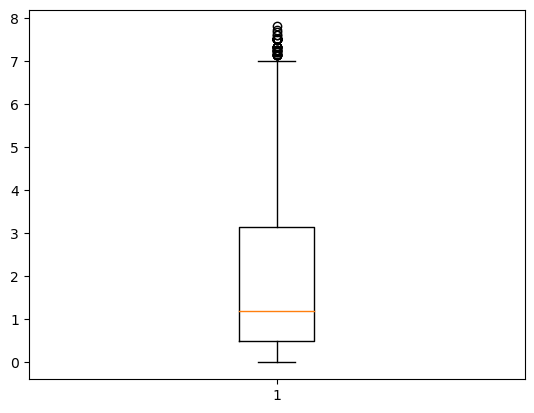

In [56]:
plt.boxplot(MPH_clean['ricetotal_q'])

In [57]:
MPH_clean['District'].unique()

array([49, 40, 41, 47, 39, 44, 42, 10, 38, 17, 13, 16, 12, 15, 14, 11, 50,
        8,  4,  7,  3,  6,  5,  2,  9,  1, 23, 24, 22, 46, 30, 21, 18, 19,
       20, 26, 32, 48, 43, 34, 35, 33, 37, 36, 45, 31, 29, 28, 27, 25],
      dtype=int64)

In [58]:
# Replace values in the 'Sector' column
MPH_clean.loc[:,'Sector'] = MPH_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [27]:
#total consumption

In [61]:
MPH_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home',
       'total_consumption'],
      dtype='object')

In [62]:
MPH_clean.loc[:, 'total_consumption'] = MPH_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [63]:
MPH_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
2091,MP,49,RURAL,1,231,1.000000,8.000000,0.100000,0,0.0,0.0,21.510180,36.000000,60.0,66.610180
2092,MP,49,RURAL,1,231,1.000000,10.000000,0.083333,0,0.0,0.0,26.233667,16.666667,60.0,53.983667
2093,MP,49,RURAL,1,231,0.500000,8.125000,0.062500,0,0.0,0.0,15.087706,3.750000,60.0,27.525206
2094,MP,49,RURAL,1,231,1.428571,9.285714,0.142857,0,0.0,0.0,20.257300,7.142857,60.0,38.257300
2095,MP,49,RURAL,1,231,0.500000,10.000000,0.000000,0,0.0,0.0,23.425425,10.000000,60.0,43.925425


In [64]:
MPH_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                            
                     std       mean         max  min
Region                                              
1              29.560237  46.640378  532.920880  0.0
2              38.829794  54.058974  551.007358  0.0
3              36.706541  55.662767  368.150555  0.0
4              23.742635  43.056724  228.551375  0.0
5              13.588121  38.945954  140.886029  0.0
6              31.381611  50.936510  361.951650  0.0

In [65]:
MPH_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                16.775819  39.746085  102.950500  17.940200
2                19.073353  44.085860  122.815275  18.262662
3                16.968680  42.753640  119.150300  21.950169
4                37.374055  50.190857  235.688827  17.257750
5                22.757348  47.536850  138.277767  20.528800
6                45.287017  65.215649  361.951650   0.000000
7                38.497496  58.312801  299.831165  23.387795
8                21.852111  54.327756  143.701710  18.300000
9                53.524958  64.259850  532.920880  18.728716
10               23.481478  49.247331  138.950163  14.283386
11               36.857306  54.414838  340.839137  12.608433
12               36.850612  57.929265  296.460550  18.935871
13               19.197056  43.727410  153.575265  21.718437
14               39.902524  49.481078  423.875520   0.000000
15               16.523679  41.945661   98.400473  26.370070
16               12.689767  38.899458   79.925275  21.420040
17               16.718969  37.721699  103.307825  17.875053
18               37.465217  52.226480  210.733977  20.360160
19               28.003673  51.176768  159.725825  18.783460
20               21.951832  42.260451  139.851975  14.666850
21               39.690816  64.011533  236.045783   6.200000
22               36.275602  48.298919  368.150555   0.000000
23               33.855594  53.693723  238.000275  13.900585
24               18.701657  39.959696  126.017220  18.310280
25               40.250016  64.869301  214.600400   0.000000
26               47.764086  69.874306  282.860450  16.014621
27               10.166227  40.517103   69.760136  16.107271
28               14.084628  38.593005  131.900800  18.200549
29               10.940196  37.999688   71.139261   0.000000
30               31.594859  55.898809  193.375348   6.880000
31               58.686453  58.446243  551.007358  15.791918
32               36.957188  54.191858  335.480256   0.000000
33               27.034604  43.908925  170.626250   0.000000
34               30.520705  55.282438  175.801020  18.700380
35                9.738820  34.849389   79.060165   0.000000
36               14.390718  38.462336   71.467048   0.000000
37               20.166315  41.184527  140.886029  10.000000
38               26.203667  46.447708  139.176310   7.448220
39               24.994098  45.469218  175.433373   8.620000
40               25.979579  53.048309  199.640492  15.700110
41               12.958814  33.770509   79.500533  12.228715
42               31.237234  39.575799  228.551375  15.000000
43               20.502409  40.108454  212.100000  19.812693
44               20.626990  42.666259  101.275600   0.000000
45               13.173145  39.160220   91.050400  23.505155
46               27.769475  60.623462  207.025908  31.225184
47               14.939470  36.971601  127.575130  24.450108
48               15.200552  42.819423  108.350470  25.417386
49               17.099732  37.697130   89.450175  10.000000
50               13.531332  40.836403   84.908130  19.666743

In [66]:
total_consumption_by_districtcode=MPH_clean.groupby('District')['total_consumption'].sum()

In [67]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
26    11179.888996
11     8651.959181
32     8562.313518
Name: total_consumption, dtype: float64

In [68]:
MPH_clean.loc[:,"District"] = MPH_clean.loc[:,"District"].replace({26:"Indore", 11:"Sagar", 32:"Bhopal"})

In [69]:
total_consumption_by_districtname=MPH_clean.groupby('District')['total_consumption'].sum()

In [70]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Indore    11179.888996
Sagar      8651.959181
Bhopal     8562.313518
Name: total_consumption, dtype: float64

In [71]:
from statsmodels.stats import weightstats as stests

In [72]:
rural=MPH_clean[MPH_clean['Sector']=="RURAL"]
urban=MPH_clean[MPH_clean['Sector']=="URBAN"]

In [73]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
2091,MP,49,RURAL,1,231,1.000000,8.000000,0.100000,0,0.0,0.0,21.510180,36.000000,60.0,66.610180
2092,MP,49,RURAL,1,231,1.000000,10.000000,0.083333,0,0.0,0.0,26.233667,16.666667,60.0,53.983667
2093,MP,49,RURAL,1,231,0.500000,8.125000,0.062500,0,0.0,0.0,15.087706,3.750000,60.0,27.525206
2094,MP,49,RURAL,1,231,1.428571,9.285714,0.142857,0,0.0,0.0,20.257300,7.142857,60.0,38.257300
2095,MP,49,RURAL,1,231,0.500000,10.000000,0.000000,0,0.0,0.0,23.425425,10.000000,60.0,43.925425


In [74]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
80540,MP,14,URBAN,1,231,3.000000,4.200000,0.0,0,0.0,0.0,26.610218,34.000000,60.0,67.810218
80541,MP,14,URBAN,1,231,3.333333,5.000000,0.0,0,0.0,0.0,13.688941,2.777778,52.0,24.800052
80542,MP,14,URBAN,1,231,3.666667,5.833333,0.0,0,0.0,0.0,21.783533,23.333333,56.0,54.616867
80543,MP,14,URBAN,1,231,3.333333,5.833333,0.0,0,0.0,0.0,21.650133,8.333333,60.0,39.150133
80544,MP,14,URBAN,1,231,4.500000,10.000000,0.0,0,0.0,0.0,26.687855,20.000000,60.0,61.187855


In [75]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [76]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 9.860678180278635
P-Value: 6.16316899436021e-23
